In [70]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline 
%reload_ext autoreload
%autoreload 2
import numpy as np 
import pandas as pd
from fastai import *
import os
import shutil
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
def findImageName(nameType):
    f = open("aesthetics_image_lists/"+nameType+".jpgl", "r")
    # list_filename = []
    filename = ""
    for x in f:
        filename = filename + x

    list_filename = filename.split("\n")
    del filename

    list_filename = [s + ".jpg" for s in list_filename]
    return list_filename

In [4]:
# cityscape = findImageName("cityscape_train") + findImageName("cityscape_test")

# landscape = findImageName("landscape_train") + findImageName("landscape_test") 

# architecture = findImageName("architecture_train") + findImageName("architecture_test")

# portrait = findImageName("portrait_train") + findImageName("portrait_test")

# fooddrink = findImageName("fooddrink_train") + findImageName("fooddrink_test")

# stilllife = findImageName("stilllife_train") + findImageName("stilllife_test")

In [44]:


# Input data files are available in the "../input/" directory.
# Any results you write to the current directory are saved as output.

PATH = "data/"

In [58]:
! rm -rf data/train/fooddrink
! rm -rf data/valid/fooddrink

In [59]:
with open('drink.txt','r') as f:
    img_list = f.readlines()
    
f.close()
fooddrink = [ x.replace('\n','') for x in img_list]

In [60]:
# ! rm -rf data
# os.makedirs(f'{PATH}train/cityscape')
# os.makedirs(f'{PATH}train/landscape')
# os.makedirs(f'{PATH}train/architecture')
# os.makedirs(f'{PATH}train/portrait')
os.makedirs(f'{PATH}train/fooddrink')
# # os.makedirs(f'{PATH}train/stilllife')
# os.makedirs(f'{PATH}valid/cityscape')
# os.makedirs(f'{PATH}valid/landscape')
# os.makedirs(f'{PATH}valid/architecture')
# os.makedirs(f'{PATH}valid/portrait')
os.makedirs(f'{PATH}valid/fooddrink')
# # os.makedirs(f'{PATH}valid/stilllife')
# os.makedirs(f'{PATH}test')

In [61]:
# Symbolic links for test images
import shutil
for file in tqdm(os.listdir('/tf/upload/images')):
    if file in fooddrink : os.symlink('/tf/upload/images/' + file, 'data/train/fooddrink/' + file)

In [62]:
# # Symbolic links for test images
# import shutil
# for file in tqdm(os.listdir('/tf/upload/images')):
#     if file in cityscape : os.symlink('/tf/upload/images/' + file, 'data/train/cityscape/' + file)
#     elif file in landscape : os.symlink('/tf/upload/images/' + file, 'data/train/landscape/' + file)
#     elif file in architecture : os.symlink('/tf/upload/images/' + file, 'data/train/architecture/' + file)
#     elif file in portrait : os.symlink('/tf/upload/images/' + file, 'data/train/portrait/' + file)
#     elif file in fooddrink : os.symlink('/tf/upload/images/' + file, 'data/train/fooddrink/' + file)
# #     elif file in stilllife : os.symlink('/tf/upload/images/' + file, 'data/train/stilllife/' + file)

In [63]:
def checkAndRemoveFile(name_type_list,name_list):
    for file in tqdm(name_type_list):
        if file in os.listdir('data/train/'+name_list+'/'):
            pass
        else:
            name_type_list.remove(file)
    return name_type_list

In [64]:
# fooddrink = checkAndRemoveFile(fooddrink,'fooddrink')
# cityscape = checkAndRemoveFile(cityscape,'cityscape')
# landscape = checkAndRemoveFile(landscape,'landscape')
# architecture = checkAndRemoveFile(architecture,'architecture')
# portrait = checkAndRemoveFile(portrait,'portrait')
# # stilllife = checkAndRemoveFile(stilllife,'stilllife')

In [65]:
import random
from math import floor
def calcFraction(name_type_list,n=0.2):
    return floor(len(name_type_list)*n)

In [66]:
random.seed(420)
def moveValidFile(name_type_list,name_type,PATH):
    for valid_file in tqdm(random.sample(name_type_list,calcFraction(name_type_list))):
        os.rename(f'{PATH}train/{name_type}/{valid_file}', f'{PATH}valid/{name_type}/{valid_file}')

In [67]:
fooddrink = [x for x in fooddrink if x not in ['.DS_Store']]

In [68]:
# moveValidFile(cityscape,'cityscape',PATH)
# moveValidFile(landscape,'landscape',PATH)
# moveValidFile(architecture,'architecture',PATH)
moveValidFile(fooddrink,'fooddrink',PATH)
# moveValidFile(portrait,'portrait',PATH)

In [69]:
# Image size, batch size and pretrained model architecture
sz=224
bs= 20

In [84]:
%%time
## Loading data 
from fastai import *
from fastai.vision import *
# path_img = Path(PATH)
# data = ImageDataBunch.from_folder(path=path_img, ds_tfms=get_transforms(),size=224, bs=bs)

tfms = get_transforms(do_flip=False)
# data = (ImageDataBunch.from_folder(PATH)
data = (ImageList.from_folder(PATH)
        .split_by_folder('train','valid')           
        .label_from_folder()
        .transform(tfms, size=sz, resize_method=ResizeMethod.PAD, padding_mode='zeros')
        .databunch(bs=bs,num_workers=0)
        .normalize(imagenet_stats))
# data = (ImageList.from_folder(PATH)
#         .split_by_folder()          
#         .label_from_folder()
#         .transform(tfms, size=sz)
#         .databunch(size=224, resize_method=ResizeMethod.SQUISH)
#         .normalize(imagenet_stats))

CPU times: user 11.7 s, sys: 284 ms, total: 12 s
Wall time: 1.36 s


In [85]:
data

ImageDataBunch;

Train: LabelList (20695 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fooddrink,fooddrink,fooddrink,fooddrink,fooddrink
Path: data;

Valid: LabelList (5167 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fooddrink,fooddrink,fooddrink,fooddrink,fooddrink
Path: data;

Test: None

CPU times: user 8.72 s, sys: 424 ms, total: 9.15 s
Wall time: 724 ms


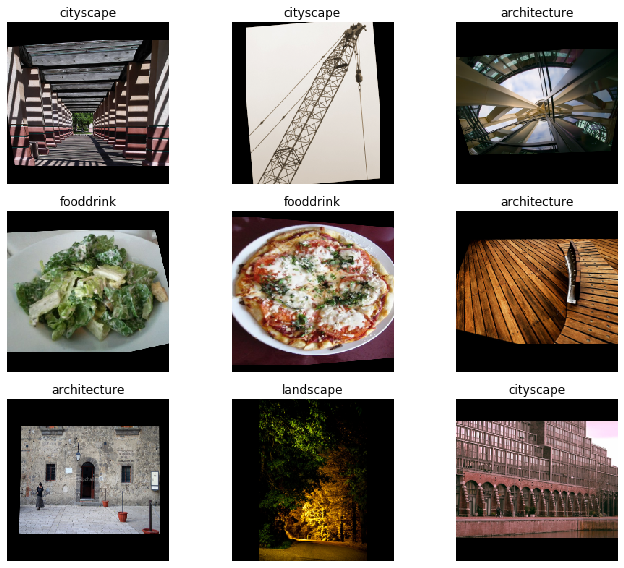

In [86]:
%%time
data.show_batch(rows=3, figsize=(10,8))

In [87]:
%%time
print(data.classes)
len(data.classes),data.c

['architecture', 'cityscape', 'fooddrink', 'landscape', 'portrait']
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 307 µs


(5, 5)

In [88]:
%%time
from fastai import *
from fastai.vision import *
learn = cnn_learner(data, models.vgg19_bn, metrics=error_rate)

CPU times: user 2.67 s, sys: 792 ms, total: 3.46 s
Wall time: 1.93 s


In [89]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage1'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

epoch,train_loss,valid_loss,error_rate,time
0,0.630782,0.482731,0.186375,2:30:06


In [90]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage2'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

epoch,train_loss,valid_loss,error_rate,time
0,0.592756,0.469987,0.189085,2:21:44


In [91]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage3'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

epoch,train_loss,valid_loss,error_rate,time
0,0.531955,0.466098,0.191020,2:23:07


In [92]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage4'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

epoch,train_loss,valid_loss,error_rate,time
0,0.510773,0.456249,0.180569,2:22:24


In [94]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage5'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

epoch,train_loss,valid_loss,error_rate,time
0,0.518555,0.455636,0.180763,2:23:54


In [ ]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage6'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage7' 
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

In [ ]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage8'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

In [ ]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage9'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

In [ ]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage10'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

In [ ]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage11'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

In [ ]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage12'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

In [ ]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage13'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

In [ ]:
learn.fit_one_cycle(1)
savename = 'fixed_pad_vgg19_stage14'
learn.save(savename,return_path=True)
learn.export(f'{savename}.pkl')

In [36]:
# learn.fit_one_cycle(1)
# learn.save('ava_classify_pad_vgg16_stage2')
# learn.export('ava_classify_pad_vgg16_stage2.pkl')

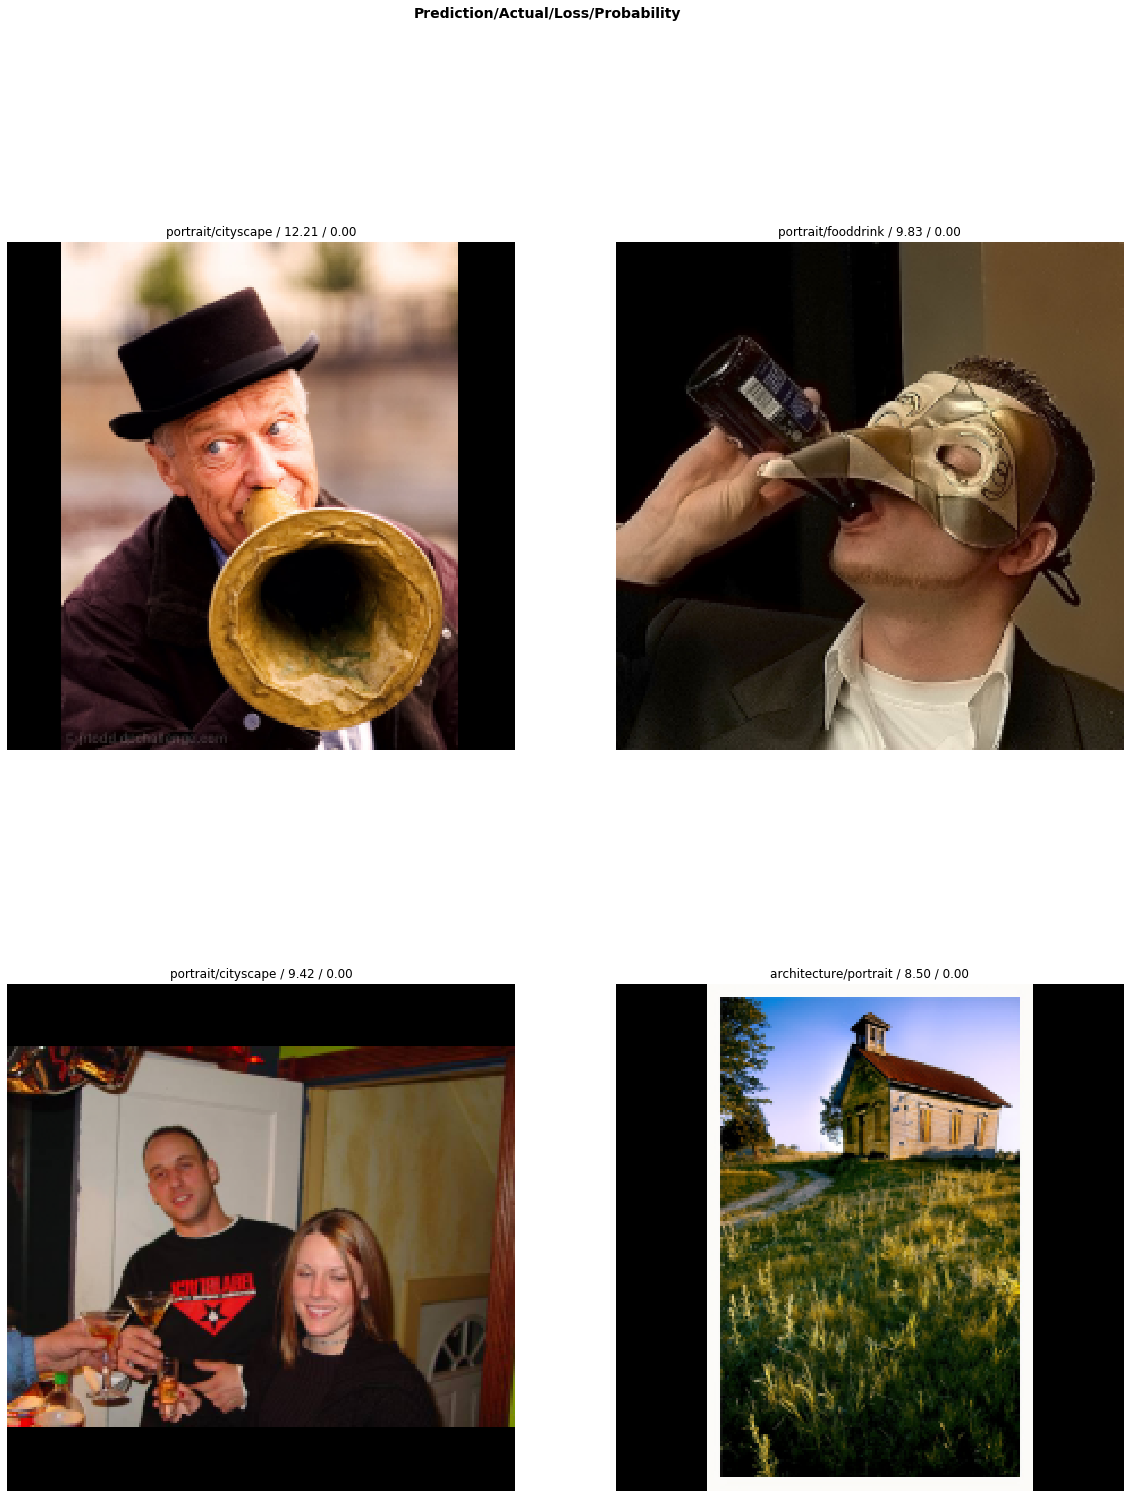

In [109]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(20,25))

In [49]:
# now replace the validation dataset entry with the test dataset as a new validation dataset: 
# everything is exactly the same, except replacing `split_by_pct` w/ `split_by_folder` 
# (or perhaps you were already using the latter, so simply switch to valid='test')

def testImage(folder):
    import matplotlib as mplot
    import operator
    mplot.rcParams.update({'figure.max_open_warning': 0})
    data_test = ImageList.from_folder(PATH)\
            .split_by_folder(train='train', valid=folder)\
            .label_from_folder()\
            .transform(tfms, size=sz, resize_method=ResizeMethod.SQUISH)\
            .databunch(bs=bs,num_workers=0)
    data_test.valid_dl = data_test.valid_dl.new(shuffle=False)
    #        
    sort_list = []

    for k,i in tqdm(enumerate(data_test.valid_ds)):
        score = str(data_test.valid_ds.items[k]).split('/')[-1].split('pym')[0]
        label = learn.predict(i[0] ,return_x=True)[1]
        image = i[0]
        sort_list.append((image,label,score))

    sort_list.sort(key=operator.itemgetter(2))
    for i in tqdm(sort_list):
        i[0].show(title=f'{i[2]} {i[1]}')
#     i[0].show(title=f'{learn.predict(i[0] ,return_x=True)[1]} {pic_name}')
#     print(learn.predict(i[0] ,return_x=True))
# learn.validate(data_test.valid_dl)